In [1]:
# Михайлова Алиса пм22-3
# 16 вариант 

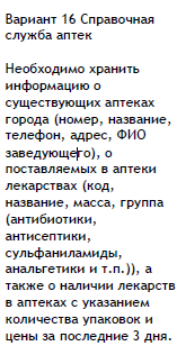

In [2]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 1.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.2 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.2 MB 2.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 2.4 MB/s eta 0:00:01
   ------------------------- -------------- 0.7/1.2 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.2 MB 2.3 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.2 MB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 2.2 MB/s eta 0:00:01
   -------------------

In [2]:
import psycopg2

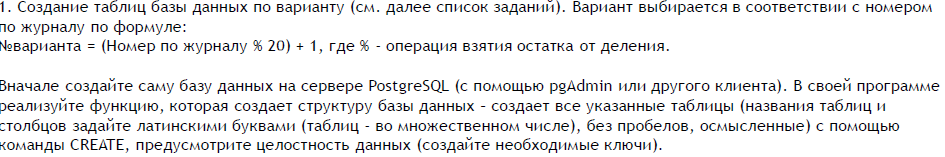

In [4]:
def create_tables():
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        # Создание таблиц
        cursor.execute("""
            CREATE TABLE pharmacies (
                number INT PRIMARY KEY,
                title VARCHAR(50),
                telephone INT,
                address VARCHAR(50),
                fio VARCHAR(100)
            );
        """)

        cursor.execute("""
            CREATE TABLE medicines (
                id INT PRIMARY KEY,
                title VARCHAR(50),
                weight NUMERIC,
                group_name VARCHAR(50)
            );
        """)

        cursor.execute("""
            CREATE TABLE availability (
                pharmacies_number INT,
                medicines_id INT,
                quantity INT,
                price INT,
                PRIMARY KEY (pharmacies_number, medicines_id),
                FOREIGN KEY (pharmacies_number) REFERENCES pharmacies(number),
                FOREIGN KEY (medicines_id) REFERENCES medicines(id)
             );
        """)

        con.commit()
        con.close()

        print("Таблицы успешно созданы.")

# Создание таблиц
create_tables()

Таблицы успешно созданы.


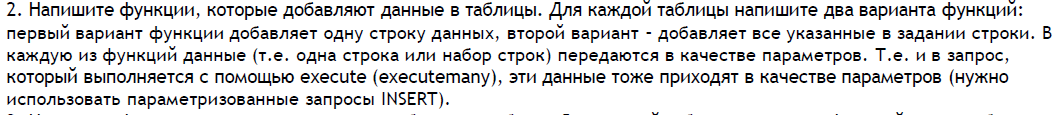

In [5]:
def create_tables_all(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        # Заполнение таблиц
        cursor.execute(f"""
            INSERT INTO pharmacies (number, title, telephone, address, fio)
            VALUES {parametrs};
        """)

        con.commit()
        con.close()

        print("Таблица успешно заполнена.")

create_tables_all("(1, 'Спрей', 354678, 'Первомайский проезд', 'Иванова М.И.')")

Таблица успешно заполнена.


In [6]:
create_tables_all("(2, 'Здоровье', 332211, 'Энгельса, 6', 'Семущева Е.Е.'), \
                   (3, 'Парацельс', 666666, 'Ленина, 35', 'Рычкова И.Г.'), \
                   (4, 'Солнышко', 123456, 'Беляков, 8', 'Герман Е.В.'), \
                   (5, 'Центральная', 654321, 'Октябрьская, 13', 'Пилюлькин Е.Ц.'), \
                   (6, 'Капелька', 134223, 'Забайкальская, 12', 'Дынькин К.Г.'), \
                   (7, 'Айболит', 124355, 'Гагарина, 23', 'Кац Ц.Б.'), \
                   (8, 'Неболей', 245376, 'Горького, 46', 'Малахов Г.П.'), \
                   (9, 'Намибия', 243462, 'Есенина, 23', 'Тебенихина Н.И.'), \
                   (10, 'Добродей', 125433, 'Островского, 11', 'Черных Ю.К.')")

Таблица успешно заполнена.


In [7]:
def create_tables_all2(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        # Заполнение таблиц
        cursor.execute(f"""
            INSERT INTO medicines (id, title, weight, group_name)
            VALUES {parametrs};
        """)

        con.commit()
        con.close()

        print("Таблица успешно заполнена.")

create_tables_all2("(1, 'Диоксидин', 0.8, 'Антисептики')")

Таблица успешно заполнена.


In [8]:
create_tables_all2("(2, 'Парацетамол', 0.6, 'Анальгетики'), \
                   (3, 'Тетрациклин', 0.5, 'Антибиотики'), \
                   (4, 'Амоксиклав', 1, 'Антибиотики'), \
                   (5, 'Пенициллин', 0.5, 'Антибиотики'), \
                   (6, 'Фенозепам', 1, 'Анксиолитики'), \
                   (7, 'Этазол', 1, 'Сульфаниламиды'), \
                   (8, 'Аспирин', 0.5, Null), \
                   (9, 'Уросульфан', 0.8, 'Сульфаниламиды'), \
                   (10, 'Ципролет', 1, 'Антибиотики')")

Таблица успешно заполнена.


In [9]:
def create_tables_all3(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        # Заполнение таблиц
        cursor.execute(f"""
            INSERT INTO availability (pharmacies_number, medicines_id, quantity, price)
            VALUES {parametrs};
        """)

        con.commit()
        con.close()

        print("Таблица успешно заполнена.")

create_tables_all3("(1, 1, 50, 200)")

Таблица успешно заполнена.


In [10]:
create_tables_all3("(1, 2, 120, 100), \
                   (2, 8, 100, 140), \
                   (2, 5, 50, 72), \
                   (3, 1, 70, 220), \
                   (3, 2, 15, 95), \
                   (3, 7, 30, 450), \
                   (4, 8, 20, 30), \
                   (4, 6, 40, 90), \
                   (6, 4, 15, 20), \
                   (6, 5, 55, 65), \
                   (7, 9, 100, 190), \
                   (7, 4, 30, 25), \
                   (8, 9, 60, 201), \
                   (8, 10, 20, 80), \
                   (9, 7, 1, 500), \
                   (9, 8, 15, 70), \
                   (9, 9, 30, 197), \
                   (10, 5, 12, 71), \
                   (10, 10, 27, 103)")

Таблица успешно заполнена.


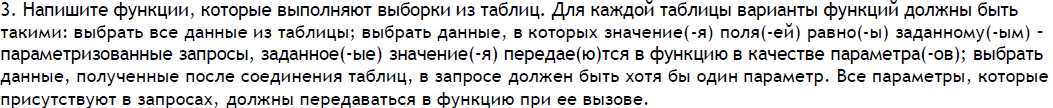

In [11]:
import pandas as pd

In [12]:
def select_1(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            SELECT * FROM {parametrs};
        """)
        result = cursor.fetchall()
        print(pd.DataFrame(result))
        con.commit()
        con.close()

select_1('pharmacies')

    0            1       2                    3                4
0   1        Спрей  354678  Первомайский проезд     Иванова М.И.
1   2     Здоровье  332211          Энгельса, 6    Семущева Е.Е.
2   3    Парацельс  666666           Ленина, 35     Рычкова И.Г.
3   4     Солнышко  123456           Беляков, 8      Герман Е.В.
4   5  Центральная  654321      Октябрьская, 13   Пилюлькин Е.Ц.
5   6     Капелька  134223    Забайкальская, 12     Дынькин К.Г.
6   7      Айболит  124355         Гагарина, 23         Кац Ц.Б.
7   8      Неболей  245376         Горького, 46     Малахов Г.П.
8   9      Намибия  243462          Есенина, 23  Тебенихина Н.И.
9  10     Добродей  125433      Островского, 11      Черных Ю.К.


In [13]:
def select_2(parametrs1, parametrs2, parametrs3):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            SELECT * FROM {parametrs1} WHERE {parametrs2} = '{parametrs3}';
        """)
        result = cursor.fetchall()
        print(pd.DataFrame(result))
        con.commit()
        con.close()

select_2('pharmacies', 'title', 'Солнышко')

   0         1       2           3            4
0  4  Солнышко  123456  Беляков, 8  Герман Е.В.


In [23]:
def select_3(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="demo",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            SELECT * FROM  availability a JOIN medicines m ON a.medicines_id = m.id WHERE  weight = {parametrs};
        """)
        result = cursor.fetchall()
        print(pd.DataFrame(result))
        con.commit()
        con.close()

select_3('1')

    0   1   2    3   4           5  6               7
0   6   4  15   20   4  Амоксиклав  1     Антибиотики
1   7   4  30   25   4  Амоксиклав  1     Антибиотики
2   4   6  40   90   6   Фенозепам  1    Анксиолитики
3   3   7  30  450   7      Этазол  1  Сульфаниламиды
4   9   7   1  500   7      Этазол  1  Сульфаниламиды
5   8  10  20   80  10    Ципролет  1     Антибиотики
6  10  10  27  103  10    Ципролет  1     Антибиотики


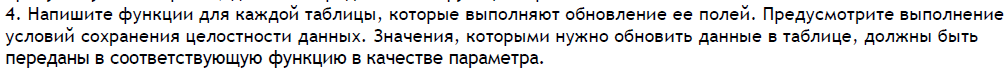

In [14]:
def update_1(parametrs1, parametrs2):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            UPDATE pharmacies SET telephone={parametrs1} WHERE title = '{parametrs2}';
        """)
        con.commit()
        cursor.execute(f"""
            SELECT * FROM pharmacies WHERE title = '{parametrs2}';
        """)
        result = cursor.fetchall()
        print(pd.DataFrame(result))
        con.close()

update_1('888999', 'Солнышко')

   0         1       2           3            4
0  4  Солнышко  888999  Беляков, 8  Герман Е.В.


In [21]:
def update_2(parametrs1):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            UPDATE availability SET quantity={parametrs1} WHERE quantity = 20 AND price = 30;
        """)
        con.commit()
        cursor.execute(f"""
            SELECT * FROM availability WHERE quantity={parametrs1};
        """)
        result = cursor.fetchall()
        print(pd.DataFrame(result))
        con.close()

update_2('45')

   0  1   2   3
0  4  8  45  30


In [24]:
def update_3(parametrs1):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            UPDATE medicines SET weight=2*{parametrs1} WHERE weight = 0.8;
        """)
        con.commit()
        cursor.execute(f"""
            SELECT * FROM medicines WHERE weight=2*{parametrs1};
        """)
        result = cursor.fetchall()
        print(pd.DataFrame(result))
        con.close()

update_3('10')

   0           1   2               3
0  1   Диоксидин  20     Антисептики
1  9  Уросульфан  20  Сульфаниламиды


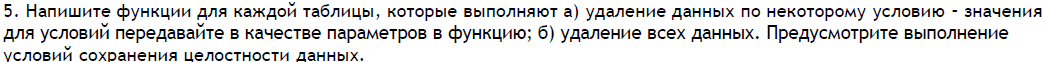

In [26]:
def delete_1(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            DELETE FROM availability WHERE pharmacies_number = {parametrs};
        """)
        con.commit()
        con.close()
        print('Удаление прошло!')
delete_1('1')

Удаление прошло!


In [29]:
def delete_11():
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            DELETE FROM availability;
        """)
        con.commit()
        con.close()
        print('Таблицы больше нет!')
delete_11()

Таблицы больше нет!


In [31]:
def delete_2(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            DELETE FROM medicines WHERE title = '{parametrs}';
        """)
        con.commit()
        con.close()
        print('Удаление прошло!')
delete_2('Парацетамол')

Удаление прошло!


In [32]:
def delete_22():
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            DELETE FROM medicines;
        """)
        con.commit()
        con.close()
        print('Таблицы больше нет!')
delete_22()

Таблицы больше нет!


In [33]:
def delete_3(parametrs):
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            DELETE FROM pharmacies WHERE telephone = {parametrs};
        """)
        con.commit()
        con.close()
        print('Удаление прошло!')
delete_3('666666')

Удаление прошло!


In [34]:
def delete_33():
        # Подключение к созданной базе данных
        con = psycopg2.connect(database="postgres",
                               user="postgres",
                               password="postgres",
                               host="127.0.0.1",
                               port="5432"
                                )

        cursor = con.cursor()

        cursor.execute(f"""
            DELETE FROM pharmacies;
        """)
        con.commit()
        con.close()
        print('Таблицы больше нет!')
delete_33()

Таблицы больше нет!
